The **Breast Cancer Wisconsin (Diagnostic)** **dataset** contains **32 columns**, with the first representing the sample ID for each patient, and the last indicating whether the tumor is benign or malignant.

The other columns describe the characteristics of the tumor:

1. **Radius, perimeter, area**: Geometric measurements of the tumor. 📏

2. **Texture**: Indicates the homogeneity or heterogeneity of the tumor, based on grayscale levels of the images. 🌈

3. **Compactness**: Ratio between the perimeter and area, providing an indication of the shape. 🔄

4. **Concavity**: Quantifies the level of concave curvature in the tumor contours. 🌀

5. **Symmetry**: Measures the symmetry or asymmetry of the tumor. ⚖️

6. **Frequency of texture fringes**: Textural characteristic, describing the regularity of the surface. 🔍

The **30 feature columns** are divided into means, standard errors, and extreme values.

# Library Importation and Setup ✅

In [99]:
!pip install scipy

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from scipy.stats import shapiro
import scipy.stats as stats
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, roc_auc_score,
                             classification_report)
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE


#Data Exploration 📊

## Data Importation ( csv file )

In [101]:
df = pd.read_csv('/content/data (1).csv')

In [102]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [103]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Remove ( unnamed: 32 )

In [104]:
df = df.drop(['Unnamed: 32'] , axis = 1)

# Split the data into training and test sets. 🤖

We chose to divide our dataset into 70% for training and 30% for testing (test_size=0.3).

 With 569 samples in total, this gives us enough data to train the model effectively, while keeping a representative test sample to evaluate its performance.

 This approach ensures that our model learns well, while giving us an accurate and reliable assessment of its capabilities on unseen data. 🎯

In [105]:
# Create variables X and y
# Extract the 'diagnosis' column as y
y = df['diagnosis']
# Drop all other columns as X
X = df.drop(columns=['diagnosis'])
# Divide data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Engineering : Data Transformation and Feature selection ⚡

## Target Variable Encoding for Binary Classification ✅
The code below is used to convert the values of **the y_train** series containing **the training data of our target variable** into numerical values.

In this case, the diagnostic classification labels are coded as follows:

 **M' (malignant) is replaced by 1 and 'B' (benign) by 0.**

  This transformation is essential to prepare the data before training the model, as machine learning algorithms often require numerical values rather than strings to perform calculations ...

In [106]:
y_train = y_train.map({'M': 1, 'B': 0})
print(y_train)

149    0
124    0
421    0
195    0
545    0
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 398, dtype: int64


## Exploratory Data Exploration (EDA) For Feature Selection 🔍
We perform **feature selection** on the **(X_train)** training data to maximize model performance using only relevant variables.

**N.B** ❗: *After this, in the model evaluation phase, we apply the same selection on the test data (X_test) to ensure that the two datasets are aligned.*

This allows us to evaluate the model accurately and consistently, avoiding the bias introduced by irrelevant variables.







We'll follow a feature selection approach that takes into account the correlation between variables in order to identify those that contribute most to the prediction of our target variable.
**Here's the workflow:**

1. Identify the most correlated pairs of variables 🔗 :\
 We'll use  Pearson's **correlation** to assess the linear relationships between variables.
  This will enable us to ***identify variables that are almost similar and eliminate those that are redundant***, as there's no need to keep them both.
2. Keep only the variable most correlated with the target variable 🎯 :\
 Since our **target variable  is binary**, we'll apply **biserial correlation** to determine which of the correlated variables has the most impact. \
 This will ensure that we focus on the features most relevant to our target prediction.
This methodical approach will enable us to optimize our model's performance while simplifying its structure! ✨



# 1. Identification des paires de variables les plus corrélées


## Explanatory Variable Correlation Matrix 📊


In [107]:
corr = X_train.corr()

In [108]:
corr.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.042109,0.128961,0.044116,0.073046,0.023626,0.005430,0.056109,0.026820,0.019371,...,0.061642,0.068297,0.061861,0.096988,0.026666,-0.012135,0.017883,0.000227,-0.028463,0.003682
radius_mean,0.042109,1.000000,0.304231,0.997852,0.986512,0.136103,0.457127,0.654620,0.811418,0.162263,...,0.967929,0.281395,0.963948,0.941101,0.084000,0.360294,0.513258,0.716764,0.173470,-0.055387
texture_mean,0.128961,0.304231,1.000000,0.311321,0.297186,0.009986,0.240497,0.297140,0.296437,0.110906,...,0.336194,0.905251,0.347047,0.323267,0.085070,0.277202,0.289704,0.307926,0.109941,0.080590
perimeter_mean,0.044116,0.997852,0.311321,1.000000,0.986063,0.173230,0.509227,0.695139,0.840800,0.196485,...,0.967844,0.288195,0.969469,0.941998,0.115155,0.404053,0.552025,0.745526,0.194465,-0.011397
area_mean,0.073046,0.986512,0.297186,0.986063,1.000000,0.149533,0.452539,0.666760,0.813122,0.162577,...,0.958754,0.267217,0.955825,0.958972,0.094222,0.339188,0.499420,0.694462,0.146670,-0.053357


## Heatmap of the correlation matrix 🔥

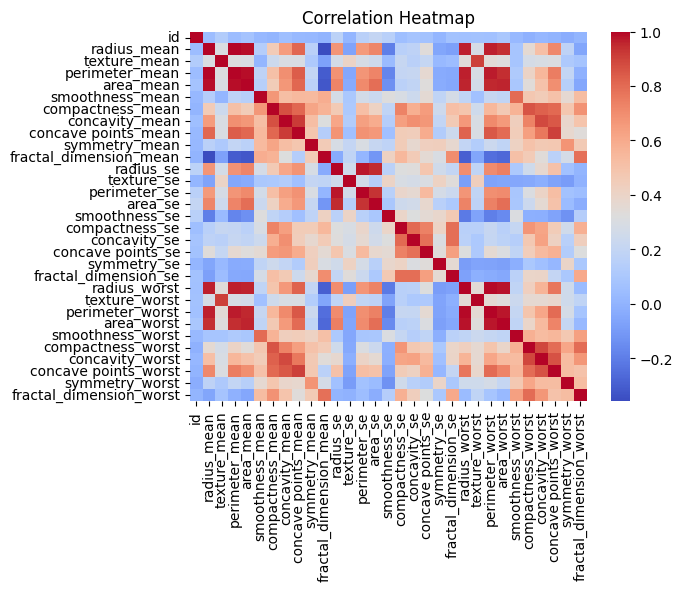

In [109]:
# Visualisation de la heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Let's analyze the pairs of explanatory variables in the correlation matrix **(correlation > 0.5)** in order to identify and **eliminate** the **one of the highly correlated** variables. \

This approach aims to mitigate multicollinearity which, in the context of our classification problem, can significantly degrade model performance. \
Indeed, such a multicollinearity problem could lead to high variance in predictions, which increases the risk of overlearning and reduces the generalizability of the model to new data. \

This results in lower classification accuracy and more unstable results.


In [110]:
high_corr_var = np.where(corr> 0.5)
high_corr_var = [(corr.columns[x], corr.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

print(high_corr_var)

[('radius_mean', 'perimeter_mean'), ('radius_mean', 'area_mean'), ('radius_mean', 'concavity_mean'), ('radius_mean', 'concave points_mean'), ('radius_mean', 'radius_se'), ('radius_mean', 'perimeter_se'), ('radius_mean', 'area_se'), ('radius_mean', 'radius_worst'), ('radius_mean', 'perimeter_worst'), ('radius_mean', 'area_worst'), ('radius_mean', 'concavity_worst'), ('radius_mean', 'concave points_worst'), ('texture_mean', 'texture_worst'), ('perimeter_mean', 'area_mean'), ('perimeter_mean', 'compactness_mean'), ('perimeter_mean', 'concavity_mean'), ('perimeter_mean', 'concave points_mean'), ('perimeter_mean', 'radius_se'), ('perimeter_mean', 'perimeter_se'), ('perimeter_mean', 'area_se'), ('perimeter_mean', 'radius_worst'), ('perimeter_mean', 'perimeter_worst'), ('perimeter_mean', 'area_worst'), ('perimeter_mean', 'concavity_worst'), ('perimeter_mean', 'concave points_worst'), ('area_mean', 'concavity_mean'), ('area_mean', 'concave points_mean'), ('area_mean', 'radius_se'), ('area_mean


Now, for each pair of variables, we'll try to determine which variable is most correlated (*biserial correlation*) with our target variable.


Note ❗: The **biserial correlation** is a measure of the relationship between a continuous variable and a dichotomous variable (i.e. a variable that can take only two values, Malignant/Bégnine for suspected tumors in our case).


It is in fact a **particular case** of the *Pearson correlation*, adapted to situations where one of the variables is dichotomous.
Biserial correlation is given by the formula:
$$r_b = \frac{\overline{X}_1 - \overline{X}_0}{\sigma_X} \times \frac{p_1 p_0}{y}$$
Where:
- $ ( \overline{X}_1 ) $ is the mean of the continuous variable for observations in category 1.
- $ ( \overline{X}_0 )$ is the mean of the continuous variable for observations in category 0.
- $ ( \sigma_X )$ is the standard deviation of the continuous variable.
- $( p_1 )$ is the proportion of observations in category
- $( p_0 )$ is the proportion of observations in category 0.
- $( y )$ is the height of the ordinate of the normal curve corresponding to the proportion \( p_1 \).





In [111]:
# we'll initialize a data frame to contain each variable and its correlation with the target variable
corr_with_target_df = pd.DataFrame(columns=['variable', 'correlation_biserial_with_diagnosis'])

# Iterate on pairs of highly correlated variables
for var1, var2 in high_corr_var:
    # Calculate biserial correlation
    corr, _ = stats.pointbiserialr(X_train[var1], y_train) # Use stats.pointbiserialr
    corr1, _1 = stats.pointbiserialr(X_train[var2], y_train) # Use stats.pointbiserialr
    new_row = pd.DataFrame({'variable': [var1], 'correlation_biserial_with_diagnosis': [corr]})
    new_row_1 = pd.DataFrame({'variable': [var2], 'correlation_biserial_with_diagnosis': [corr1]})
    # Add a new row to the results DataFrame
    corr_with_target_df = pd.concat([corr_with_target_df, new_row], ignore_index=True)
    corr_with_target_df = pd.concat([corr_with_target_df, new_row_1], ignore_index=True)
# Display results DataFrame
print(corr_with_target_df)

<ipython-input-111-462a18c973ed>:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  corr_with_target_df = pd.concat([corr_with_target_df, new_row], ignore_index=True)


                    variable  correlation_biserial_with_diagnosis
0                radius_mean                             0.712933
1             perimeter_mean                             0.726666
2                radius_mean                             0.712933
3                  area_mean                             0.688087
4                radius_mean                             0.712933
..                       ...                                  ...
269  fractal_dimension_worst                             0.290516
270     concave points_worst                             0.791089
271           symmetry_worst                             0.433798
272           symmetry_worst                             0.433798
273  fractal_dimension_worst                             0.290516

[274 rows x 2 columns]


In [112]:
corr_with_target_df.head()

,variable,correlation_biserial_with_diagnosis
0,radius_mean,0.712933
1,perimeter_mean,0.726666
2,radius_mean,0.712933
3,area_mean,0.688087
4,radius_mean,0.712933



The code below calculates the biserial correlation coefficient for each variable among the most correlated pairs.

It eliminates the variable least correlated with the target variable ('Diagnosis') by comparing the biserial correlation coefficients.

After this selection, redundancies are removed.


In [113]:
 # Create an empty list to store the indices of the lines to keep
indices_to_keep = []
# Iterate over the DataFrame, comparing consecutive values
for i in range(len(corr_with_target_df) - 1):
    if corr_with_target_df['correlation_biserial_with_diagnosis'][i] > corr_with_target_df['correlation_biserial_with_diagnosis'][i+1]:
        indices_to_keep.append(i)
        #print(“The variable with the greatest impact on the target variable between”, corr_with_target_df.iloc[i, 0], “and”, corr_with_target_df.iloc[i+1, 0], “is:”, corr_with_target_df.iloc[i, 0])
    else:
        indices_to_keep.append(i+1)
        #print(“The variable with the greatest impact on the target variable between”, corr_with_target_df.iloc[i, 0], “and”, corr_with_target_df.iloc[i+1, 0], “is:”, corr_with_target_df.iloc[i+1, 0])
# Create a new DataFrame containing only the selected rows representing the variables with the greatest impact on the target
top_correlated_features_with_target = corr_with_target_df.iloc[indices_to_keep, :]
# Delete repeated lines (based on variable names)
top_correlated_features_with_target_unique = top_correlated_features_with_target.drop_duplicates(subset='variable')
 # Create an empty list to store the indices of the lines to keep
indices_to_keep = []
# Iterate over the DataFrame, comparing consecutive values
for i in range(len(corr_with_target_df) - 1):
    if corr_with_target_df['correlation_biserial_with_diagnosis'][i] > corr_with_target_df['correlation_biserial_with_diagnosis'][i+1]:
        indices_to_keep.append(i)
        #print(“The variable with the greatest impact on the target variable between”, corr_with_target_df.iloc[i, 0], “and”, corr_with_target_df.iloc[i+1, 0], “is:”, corr_with_target_df.iloc[i, 0])
    else:
        indices_to_keep.append(i+1)
        #print(“The variable with the greatest impact on the target variable between”, corr_with_target_df.iloc[i, 0], “and”, corr_with_target_df.iloc[i+1, 0], “is:”, corr_with_target_df.iloc[i+1, 0])
# Create a new DataFrame containing only the selected rows representing the variables with the greatest impact on the target
top_correlated_features_with_target = corr_with_target_df.iloc[indices_to_keep, :]
# Delete repeated lines (based on variable names)
top_correlated_features_with_target_unique = top_correlated_features_with_target.drop_duplicates(subset='variable')
print(top_correlated_features_with_target_unique.head())
variables_names_to_keep_list = top_correlated_features_with_target_unique['variable'].tolist()
print("The variables with the greatest impact on the target variable among all the variables are:" , variables_names_to_keep_list)

               variable  correlation_biserial_with_diagnosis
1        perimeter_mean                             0.726666
2           radius_mean                             0.712933
7   concave points_mean                             0.780350
15         radius_worst                             0.761693
17      perimeter_worst                             0.770895
The variables with the greatest impact on the target variable among all the variables are: ['perimeter_mean', 'radius_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst', 'texture_worst', 'concavity_mean', 'area_mean', 'compactness_mean', 'smoothness_mean', 'smoothness_worst', 'concavity_worst', 'compactness_worst', 'symmetry_worst', 'compactness_se', 'fractal_dimension_se', 'fractal_dimension_worst', 'radius_se', 'perimeter_se', 'concave points_se', 'concavity_se']



In the end, we obtained the variables **without redundancy**, listed below, which are the most biserially correlated and therefore **significant for our target variable**.          
     
We will keep them throughout our study, in the data frame entitled : *X_train_feature_selected.*


In [114]:
X_train_feature_selected = X_train[variables_names_to_keep_list]
X_train_feature_selected.head()
X_train_feature_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 149 to 102
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   perimeter_mean           398 non-null    float64
 1   radius_mean              398 non-null    float64
 2   concave points_mean      398 non-null    float64
 3   radius_worst             398 non-null    float64
 4   perimeter_worst          398 non-null    float64
 5   area_worst               398 non-null    float64
 6   concave points_worst     398 non-null    float64
 7   texture_worst            398 non-null    float64
 8   concavity_mean           398 non-null    float64
 9   area_mean                398 non-null    float64
 10  compactness_mean         398 non-null    float64
 11  smoothness_mean          398 non-null    float64
 12  smoothness_worst         398 non-null    float64
 13  concavity_worst          398 non-null    float64
 14  compactness_worst        398 


We've kept 398 observations for the training data, they're all non-null, so we're ready to start pre-processing the resulting data...


## Data Rescaling 🔄




In [115]:
print(X_train_feature_selected.head())

     perimeter_mean  radius_mean  concave points_mean  radius_worst  \
149           88.12        13.74              0.01329         15.34   
124           86.10        13.37              0.02800         14.26   
421           98.22        14.69              0.06300         16.46   
195           82.53        12.91              0.02377         13.88   
545           87.19        13.62              0.02443         15.35   

     perimeter_worst  area_worst  concave points_worst  texture_worst  \
149            97.19       725.9               0.06019          22.46   
124            91.99       632.1               0.08978          22.75   
421           114.10       809.2               0.11080          18.34   
195            90.81       600.6               0.08235          22.00   
545            97.58       729.8               0.07174          29.09   

     concavity_mean  area_mean  ...  concavity_worst  compactness_worst  \
149         0.02881      585.0  ...           0.1564       


As can be seen in the first few lines of our DataFrame (labeled df), the values of the various variables vary considerably, from *0 and a few* for **smoothness_worst** to *more than 500* for **area_mean**.

 This heterogeneity can introduce **noise** into our data.
 It is therefore essential to perform **scaling** to prevent undesirable effects linked to this extreme variability, and to ensure better model performance.



Let's start by performing a normality test on our training data (X_train) to determine the best approach to rescaling: **normalization or standardization**. \

1.   If the data **follows a normal** (or Gaussian)  distribution, **standardization** will be the preferred method.
2.   If the data **does **not **follow a **normal** distribution, it is more appropriate to use **normalization (Min-Max scaling)**, which brings the values within a defined range (generally [0, 1]).



In [116]:
from scipy.stats import shapiro

# Apply the Shapiro-Wilk normality test for each characteristic
def test_normality(data):
    nbr_of_non_normal_variables = 0
    nbr_of_normal_variables = 0
    normality_results = {}

    for column in data.columns:
        # Apply the Shapiro-Wilk normality test for each characteristic
        stat, p_value = shapiro(data[column])
        normality_results[column] = {'W-statistic': stat, 'p-value': p_value}

        print(f"Shapiro-Wilk test for {column}:")
        print(f"W-statistic = {stat:.4f}, p-value = {p_value:.4f}")

        if p_value > 0.05:
            print(f"{column} follows a normal distribution (p > 0.05)\n")
            nbr_of_normal_variables += 1
        else:
            print(f"{column} does not follow a normal distribution (p <= 0.05)\n")
            nbr_of_non_normal_variables += 1

    print("Total number of variables whose distribution is not normal (Gaussian):", nbr_of_non_normal_variables)
    print("Total number of variables whose distribution is normal (Gaussian):", nbr_of_normal_variables)

    return normality_results

# Test data normality
normality_results = test_normality(X_train_feature_selected)


Shapiro-Wilk test for perimeter_mean:
W-statistic = 0.9265, p-value = 0.0000
perimeter_mean does not follow a normal distribution (p <= 0.05)

Shapiro-Wilk test for radius_mean:
W-statistic = 0.9322, p-value = 0.0000
radius_mean does not follow a normal distribution (p <= 0.05)

Shapiro-Wilk test for concave points_mean:
W-statistic = 0.8937, p-value = 0.0000
concave points_mean does not follow a normal distribution (p <= 0.05)

Shapiro-Wilk test for radius_worst:
W-statistic = 0.9098, p-value = 0.0000
radius_worst does not follow a normal distribution (p <= 0.05)

Shapiro-Wilk test for perimeter_worst:
W-statistic = 0.9110, p-value = 0.0000
perimeter_worst does not follow a normal distribution (p <= 0.05)

Shapiro-Wilk test for area_worst:
W-statistic = 0.8068, p-value = 0.0000
area_worst does not follow a normal distribution (p <= 0.05)

Shapiro-Wilk test for concave points_worst:
W-statistic = 0.9646, p-value = 0.0000
concave points_worst does not follow a normal distribution (p <= 

As we can deduce from  Shapiro's **test of normality** applied above to all the variables, **none of the variables follows a normal distribution** (Gaussian), so for rescaling we'll apply a **Normalization (min-max scaling)** to all the variables (since none of them follows a normal distribution). \
Data normalization, via min-max scaling, should only be performed on the training set (train) and then applied to the test data (test) using the parameters calculated on the training set. \
In practical terms, this means calculating the minimum and maximum values from the training data in order to scale the data between 0 and 1 (or another interval), using this formula : \

$X_{norm} = \frac{X - \min_{\text{train}}}{\max_{\text{train}} - \min_{\text{train}}}$


where $(min_{{train}})$ is the minimum value of the training data, \
and $(max_{{train}})$ is the maximum value of the training data.

Then, the same parameters (min and max) used to normalize the training data must be applied to the test data.
 This ensures consistent scaling and **prevents data leakage**, guaranteeing efficient model learning.


In [117]:
# Import necessary libraries
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
X_train_selected_scaled_values = scaler.fit_transform(X_train_feature_selected)

# Create a new DataFrame with the normalized data
X_train_selected_scaled = pd.DataFrame(X_train_selected_scaled_values, columns=X_train_feature_selected.columns, index=X_train_feature_selected.index)

# Display the DataFrame
X_train_selected_scaled.head()  # This will display the first 5 rows of the DataFrame


,perimeter_mean,radius_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst,texture_worst,concavity_mean,area_mean,...,concavity_worst,compactness_worst,symmetry_worst,compactness_se,fractal_dimension_se,fractal_dimension_worst,radius_se,perimeter_se,concave points_se,concavity_se
149,0.283818,0.296244,0.066054,0.243476,0.217071,0.124628,0.218396,0.278252,0.067502,0.177894,...,0.173124,0.163881,0.154741,0.102653,0.037353,0.128009,0.050154,0.038449,0.110400,0.044949
124,0.269406,0.278123,0.139165,0.204006,0.190636,0.101355,0.325762,0.285981,0.189597,0.164378,...,0.366172,0.242126,0.095210,0.228678,0.109904,0.180061,0.018975,0.021957,0.196628,0.125177
421,0.355879,0.342769,0.313121,0.284409,0.303035,0.145296,0.402032,0.168443,0.339738,0.208401,...,0.356321,0.364306,0.248768,0.376934,0.157166,0.314005,0.157414,0.190265,0.299299,0.133283
195,0.243936,0.255595,0.118141,0.190118,0.184637,0.093539,0.298803,0.265991,0.090745,0.148460,...,0.195262,0.128688,0.287601,0.102277,0.043434,0.122499,0.029947,0.034679,0.159500,0.058611
545,0.277183,0.290367,0.121421,0.243842,0.219053,0.125595,0.260305,0.454957,0.069681,0.172831,...,0.116117,0.129905,0.212300,0.140731,0.058324,0.122838,0.084918,0.061678,0.171699,0.051035


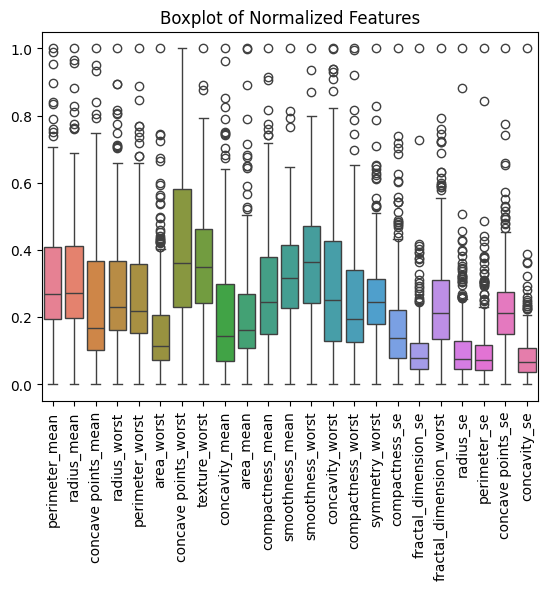

In [118]:
# Create a boxplot
sns.boxplot(data=X_train_selected_scaled)
plt.title('Boxplot of Normalized Features')  # Title in English
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Boxplot Analysis 📊:

The boxplots show that most variables have medians around 0.5 and narrow interquartiles 📊, although some, such as smoothness_mean and fractal_dimension_mean, show greater dispersion 📈.
The presence of a **significant number of outliers** indicates that, despite normalization, extreme values remain ⚠️ and **need analysis to determine their nature**.\
Finally, some variables, such as *texture_mean* and *area_mean*, show a more *homogeneous* distribution, while others, such as perimeter_mean, show greater variability.



# Handling outliers through data imputation

To deal with outliers, we replace extreme values with more representative values, such as the mean or median of the non-outlier data, for each variable.
This method reduces the impact of outliers on the analysis, while preserving the integrity of the remaining data.


In [119]:
# Function to replace outliers with the median
def replace_outliers_with_median(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # Replace outliers with the median of non-outliers
    if not outliers.empty:
        non_outlier_median = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)][column].median()
        data.loc[outliers.index, column] = non_outlier_median

    return data

# Replace outliers for each column
for column in X_train_selected_scaled.columns:
    X_train_selected_scaled_no_outliers = replace_outliers_with_median(X_train_selected_scaled, column)




We will again use 📊 boxplots to assess the improvements obtained after outlier treatment.
 These visualizations will enable us to compare the distribution of the data before and after imputation, highlighting the significant reduction in extreme values ⚠️.

 Thanks to this approach, we can better appreciate the quality of the data and the robustness of our model.


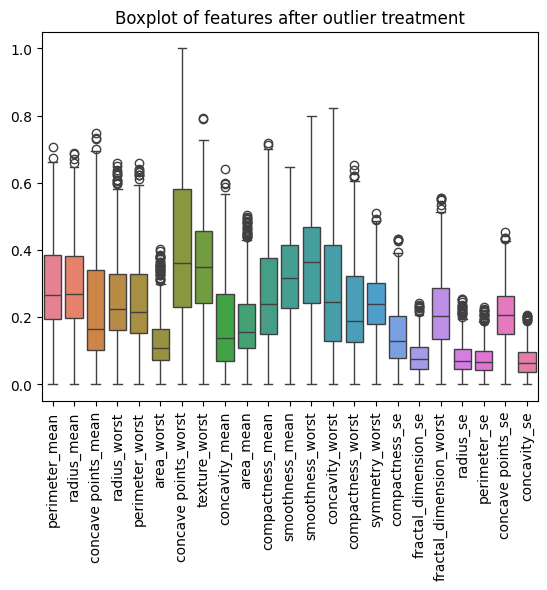

In [120]:
# Create boxplots
sns.boxplot(data=X_train_selected_scaled_no_outliers)
plt.title('Boxplot of features after outlier treatment')
plt.xticks(rotation=90)
plt.show()


# Boxplot evaluation after outlier processing

**Outlier reduction :**

After processing, there was a significant reduction in the number of points considered outliers (points outside the whiskers). This indicates that imputation has replaced extreme values with more representative ones, thereby improving data quality.

1. More homogenous distribution :
Most variables now show a more homogeneous distribution around their respective medians, many of which are around 0.5. \
  This suggests that the data are now less influenced by extreme values, making analysis more reliable.
2. Variability of Variables :
Some variables, such as area_worst and radius_worst, still show some variability, but this is now more controlled. \
 Boxplots reflect a better balance of the data, helping to avoid bias in subsequent analyses.
**Conclusion** :
The treatment of outliers has led to a significant improvement in data quality, making analyses more robust and reliable. \
These modifications are essential to ensure that our predictive models, such as logistic regression, KNN and Random Forest, can perform optimally and provide relevant results. 🚀



# Class imbalance handling ⌛

diagnosis
0    249
1    149
Name: count, dtype: int64


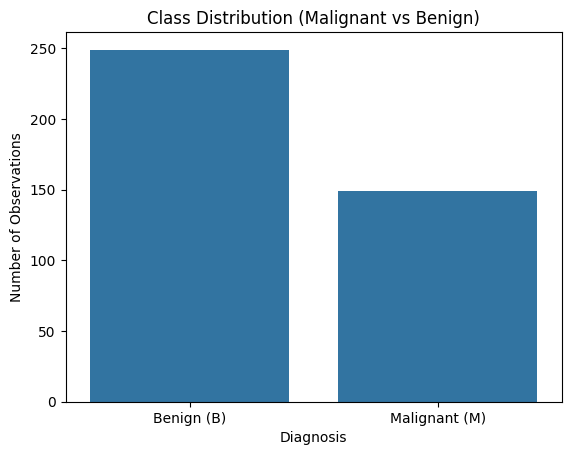

In [121]:
diagnosis_counts = y_train.value_counts()
print(diagnosis_counts)
y_train_df = y_train.to_frame(name='diagnosis')
# Diagnosis is our target variable
sns.countplot(x='diagnosis', data=y_train_df)
plt.title('Class Distribution (Malignant vs Benign)')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Observations')
plt.xticks([0, 1], ['Benign (B)', 'Malignant (M)'])  # Customize x-axis labels
plt.show()



There are 249 cases in class “0” (benign) and 149 cases in class “1” (malignant). This means that class “0” is in the majority, accounting for around 63% of the data, while class “1” is in the minority, accounting for around 37%. \
Although our dataset isn't extremely unbalanced (as in the case of a 95/5 ratio, for example), a 63/37 ratio can still cause problems, particularly with regard to : \
The model's sensitivity to detecting the minority class (here “M” or “0” for malignant). \
The influence on certain metrics, such as accuracy, which could be misleading, as the model could focus more on the majority class. \
In other words, classification algorithms (especially Random Forest, which we're going to include in our study) ** tend to favor the majority class (healthy or “1”) because it's more present in the data**. \
This can lead to a model that often predicts “healthy” even when the individual is actually ill, generating false negatives. \
❗ A high rate of false negatives** poses **a major problem**, especially in a medical study.
**In our case, this means that breast cancer patients could be incorrectly diagnosed as healthy**.
As a result, these patients would not receive the necessary treatment, which could be life-threatening ⚠️.


# Data rebalancing with SMOTE (Synthetic Minority Over-sampling Technique)


To deal with class imbalance problems, a commonly used approach is **SMOTE (Synthetic Minority Over-sampling Technique)**.

**SMOTE** is an oversampling technique that aims to balance classes by creating new synthetic examples from instances of the minority class ( which in our case is the malignant tumor (M) class ).

Thanks to **SMOTE**, our machine learning models can better learn the characteristics of the minority class (M), which helps reduce errors such as false negatives, particularly critical in our context as mentioned above.


In [122]:
# SMOTE Application
smote = SMOTE(random_state=42)
X_train_pretreated, y_train_pretreated= smote.fit_resample(X_train_selected_scaled_no_outliers, y_train)

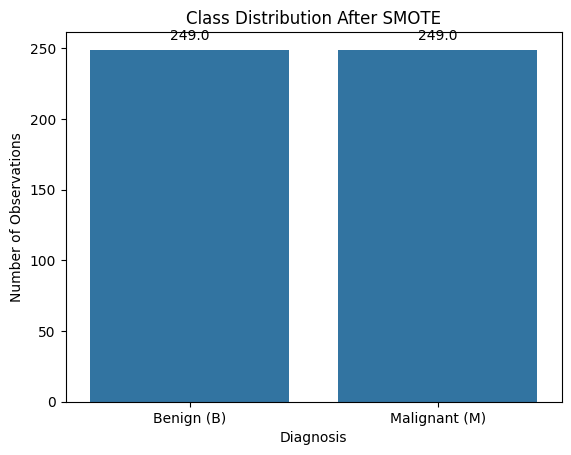

In [123]:
# 'y_train_rebalanced' became our target variable after SMOTE
ax = sns.countplot(x=y_train_pretreated)

# Add count labels to bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Class Distribution After SMOTE')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Observations')
plt.xticks([0, 1], ['Benign (B)', 'Malignant (M)'])
plt.show()


# Test data pre-processing ✅

To preprocess **X_test**, we need to :
1. Select only those variables selected during feature selection on X_train. \
2. Then apply **min-max scaling** using the parameters **obtained** from **X_train**.
3. Treat outliers in the same way as on training data.
As already mentioned, this ensures that the test data is treated consistently with the training data.

For **y_test** data, simply encode them as we have already done for y_train, assigning 1 to M and 0 to B.


In [124]:
#X_test
X_test_selected = X_test[variables_names_to_keep_list]
X_test_selected_scaled = scaler.transform(X_test_selected)
X_test_selected_scaled_df = pd.DataFrame(X_test_selected_scaled, columns=X_test_selected.columns, index=X_test_selected.index) # Add column names & index

for column in X_test_selected_scaled_df.columns:
    X_test_selected_scaled_no_outliers = replace_outliers_with_median(X_test_selected_scaled_df, column) # Update the DataFrame inplace

#y_test
y_test = y_test.map({'M': 1, 'B': 0})
print(y_test)

204    0
70     1
131    1
431    0
540    0
      ..
69     0
542    0
176    0
501    1
247    0
Name: diagnosis, Length: 171, dtype: int64


Now we're ready to start the **Data Modeling** part! 📊✨

## Logistic regression (before hyperparameter optimization) 🔍📊


Let's train the logistic regression model and measure the metrics using all the variables. \
 formula for logistic regression is :

$P(Y=1|X)$ = $\frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_nX_n)}}$

where: P(Y=1|X) represents the probability that the dependent variable Y is equal to 1, and $$\beta_0$$, $$\beta_1$$,$$\ldots$$,$$\beta_n$$ are the estimated coefficients.





In [125]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train_pretreated, y_train_pretreated)

# Make predictions on the test data
y_pred = model.predict(X_test_selected_scaled_no_outliers)
y_proba = model.predict_proba(X_test_selected_scaled_no_outliers)[:, 1]  # Probabilities for the positive class

# Calculate metrics
# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train_pretreated, y_train_pretreated)

# Make predictions on the test data
y_pred = model.predict(X_test_selected_scaled_no_outliers)
y_proba = model.predict_proba(X_test_selected_scaled_no_outliers)[:, 1]  # Probabilities for the positive class

# Calculate metrics
accuracy_no_opt = accuracy_score(y_test, y_pred)
precision_no_opt = precision_score(y_test, y_pred)
recall_no_opt = recall_score(y_test, y_pred)

## Logistic regression (after hyperparameter optimization) 🔍📊


To optimize our logistic regression model, we're going to use **a Grid Search**. In this case, the use of a Random Search is not essential, as we only have three hyperparameters to consider:

**Penalty** ⚖️ : A function used to add a penalty to the model coefficients to prevent overfitting. Common types include l1 (Lasso regularization) and l2 (Ridge regularization).

**C **📏 : A regularization hyperparameter that controls the strength of the penalty. A high value of C indicates less regularization, while a low value increases regularization.

**Solver** 🛠️ : The algorithm used to optimize model coefficients. Common solvers include liblinear (suitable for small datasets) and saga (capable of handling larger datasets and implementing both l1 and l2).

Grid Search is appropriate here, given the limited number of hyperparameters.

 On the other hand, a Random Search is more beneficial in scenarios where the number of hyperparameters is high, as is often the case with random forests.

 Indeed, testing all possible combinations in complex models may not only require a large memory capacity, but also result in significant computation times.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

             Metric     Value
0  Accuracy (Train)  0.977912
1   Accuracy (Test)  0.976608
2         Precision  0.953846
3            Recall  0.984127
4          F1-Score  0.968750

Confusion Matrix:
[[105   3]
 [  1  62]]


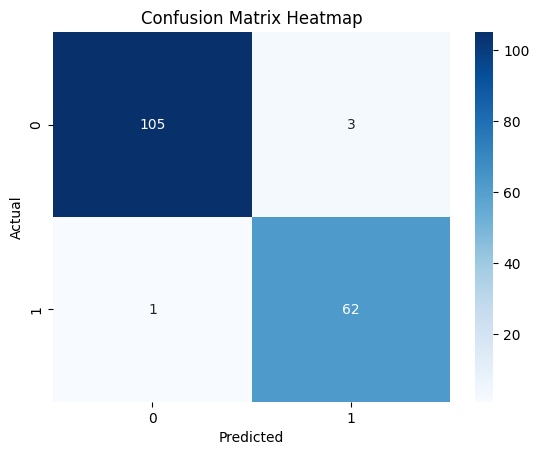

In [126]:
# Create a logistic regression model
model = LogisticRegression()

# Define parameter distributions for RandomizedSearchCV
param_dist = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'saga']
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5)

# Train the model on the training data
random_search.fit(X_train_pretreated, y_train_pretreated)

# Get the best model
best_model = random_search.best_estimator_

# Predictions on training and test data
y_pred_train = best_model.predict(X_train_pretreated)
y_pred_test = best_model.predict(X_test_selected_scaled_no_outliers)

# Calculate and print evaluation metrics
accuracy_train_logistic = accuracy_score(y_train_pretreated, y_pred_train)
accuracy_test_logistic = accuracy_score(y_test, y_pred_test)

precision_logistic_final = precision_score(y_test, y_pred_test)
recall_logistic_final = recall_score(y_test, y_pred_test)
f1_logistic_final = f1_score(y_test, y_pred_test)
conf_matrix_logistic_final = confusion_matrix(y_test, y_pred_test)

results_logistic_final = pd.DataFrame({
    'Metric': ['Accuracy (Train)', 'Accuracy (Test)', 'Precision', 'Recall', 'F1-Score'],
    'Value': [accuracy_train_logistic, accuracy_test_logistic, precision_logistic_final, recall_logistic_final, f1_logistic_final]
})

print(results_logistic_final)
print("\nConfusion Matrix:")
print(conf_matrix_logistic_final)

# Heatmap of the confusion matrix
sns.heatmap(conf_matrix_logistic_final, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()



The **performance** 📈 of the logistic regression model has been **significantly improved** 🚀 thanks to **the hyperoptimization of hyperparameters**, without overfitting ( given that train_accuracy is almost equal to test_accuracy...)! \
What's more, the False Negative rate has dropped by 50% ❗\

N.B ❗ : *This improvement is particularly important because **a false negative** can have serious consequences for patients, leading to **a delay in treatment and a worsening of their state of health**.\

 By improving Recall, we increase our ability to save lives and provide a more reliable diagnosis*.
Let's visualize the scores for each metric before and after optimization via Grid Search 🔍 in the barplot below . \

This will enable us to better appreciate the improvement achieved 🎉.



# Random Forest 🌳

Random Forest is a **supervised learning** algorithm that constructs several decision trees to improve prediction accuracy.

It combines the results of these trees by majority vote (for classification) or by average (for regression), thus reducing the risk of overlearning.

The prediction $(\hat{y})$ is expressed by :
$\hat{y} = \frac{1}{N} \sum_{i=1}^{N} f_i(x)$

where $(N)$ is the number of trees and $(f_i(x))$ is the prediction of tree $(i)$ for input $(x)$.



             Metric     Value
0  Accuracy (Train)  1.000000
1   Accuracy (Test)  0.976608
2         Precision  0.953846
3            Recall  0.984127
4          F1-Score  0.968750

Confusion Matrix:
[[105   3]
 [  1  62]]


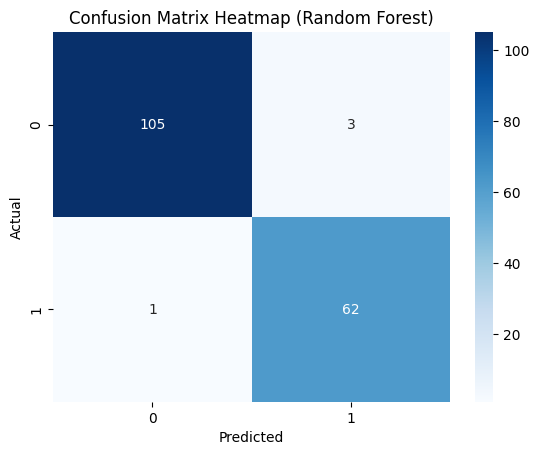

In [127]:
rf_model = RandomForestClassifier(random_state=42)  # Set random_state for reproducibility

# Train the model on the training data
rf_model.fit(X_train_pretreated, y_train_pretreated)

# Predictions on training data
y_pred_train_rf = rf_model.predict(X_train_pretreated)

# Predictions on test data
y_pred_test_rf = rf_model.predict(X_test_selected_scaled_no_outliers)

# Evaluate the model and print the results
train_accuracy_rf_tree = accuracy_score(y_train_pretreated, y_pred_train_rf)
test_accuracy_rf_tree = accuracy_score(y_test, y_pred_test_rf)
precision_rf_tree = precision_score(y_test, y_pred_test_rf)
recall_rf_tree = recall_score(y_test, y_pred_test_rf)
f1_rf_tree = f1_score(y_test, y_pred_test_rf)
conf_matrix_rf_tree = confusion_matrix(y_test, y_pred_test_rf)

results_rf_tree = pd.DataFrame({
    'Metric': ['Accuracy (Train)', 'Accuracy (Test)', 'Precision', 'Recall', 'F1-Score'],
    'Value': [train_accuracy_rf_tree, test_accuracy_rf_tree, precision_rf_tree, recall_rf_tree, f1_rf_tree]
})

print(results_rf_tree)
print("\nConfusion Matrix:")
print(conf_matrix_rf_tree)

# Heatmap of the confusion matrix
sns.heatmap(conf_matrix_rf_tree, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap (Random Forest)")
plt.show()


## Interpretation of results 📊

We obtained excellent results 🎉 : an accuracy of **0.9779** in **training** and **0.9708** in **test**, with an accuracy of **0.9394**. \
And above all, a recall of **0.984127** ! \
What's more, the difference between the two is negligible, which means there's virtually no risk of overfitting!
 The confusion matrix shows **only one false negative** among all the cases considered, i.e. a very solid performance 💪. \
 These results indicate that hyperparameter tuning is not necessary. The current parameters of the Random Forest model are already optimal, and tuning them would be irrelevant. 👍


# k-Nearest Neighbors (kNN) 🏷️


We now apply a Principal Component Analysis (PCA) to reduce the 22 selected variables to 2 principal components, allowing us to visualize the data points in 2D. The transformation will facilitate visualization of the points as a function of the target variable 'diagnosis'.


In [128]:
# 'df' is our DataFrame and 'diagnosis' is the target variable
X = df.drop(['id', 'diagnosis'], axis=1)  # Features
y = df['diagnosis']  # Target variable

# Apply PCA for dimensionality reduction (to 2D for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame to display the information
pc_df = pd.DataFrame(data={'PC': ['PC1', 'PC2'], 'Explained Variance Ratio': explained_variance_ratio})

print(pc_df)

# Optionally, print the principal components (eigenvectors)
print("\nPrincipal Components (Eigenvectors):")
print(pca.components_)


    PC  Explained Variance Ratio
0  PC1                  0.982045
1  PC2                  0.016176

Principal Components (Eigenvectors):
[[ 5.08623202e-03  2.19657026e-03  3.50763298e-02  5.16826469e-01
   4.23694535e-06  4.05260047e-05  8.19399539e-05  4.77807775e-05
   7.07804332e-06 -2.62155251e-06  3.13742507e-04 -6.50984008e-05
   2.23634150e-03  5.57271669e-02 -8.05646029e-07  5.51918197e-06
   8.87094462e-06  3.27915009e-06 -1.24101836e-06 -8.54530832e-08
   7.15473257e-03  3.06736622e-03  4.94576447e-02  8.52063392e-01
   6.42005481e-06  1.01275937e-04  1.68928625e-04  7.36658178e-05
   1.78986262e-05  1.61356159e-06]
 [ 9.28705650e-03 -2.88160658e-03  6.27480827e-02  8.51823720e-01
  -1.48194356e-05 -2.68862249e-06  7.51419574e-05  4.63501038e-05
  -2.52430431e-05 -1.61197148e-05 -5.38692831e-05  3.48370414e-04
   8.19640791e-04  7.51112451e-03  1.49438131e-06  1.27357957e-05
   2.86921009e-05  9.36007477e-06  1.22647432e-05  2.89683790e-07
  -5.68673345e-04 -1.32152605e-02 -1


The results show that the first principal component (PC1) explains 98.2% of the variance in the data, while the second principal component (PC2) explains only 1.6% of the variance.

This means that almost all the information contained in the 15 initial variables is captured by PC1. PC2 provides very little additional information. Thus, by reducing the data to two dimensions, PC1 plays a dominant role in data representation.


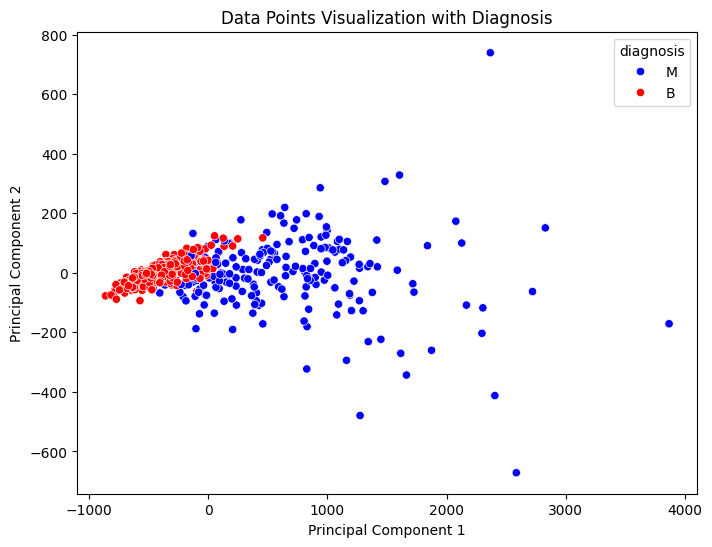

In [129]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=['blue', 'red'])  # Blue for 0, Red for 1
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Data Points Visualization with Diagnosis")
plt.show()


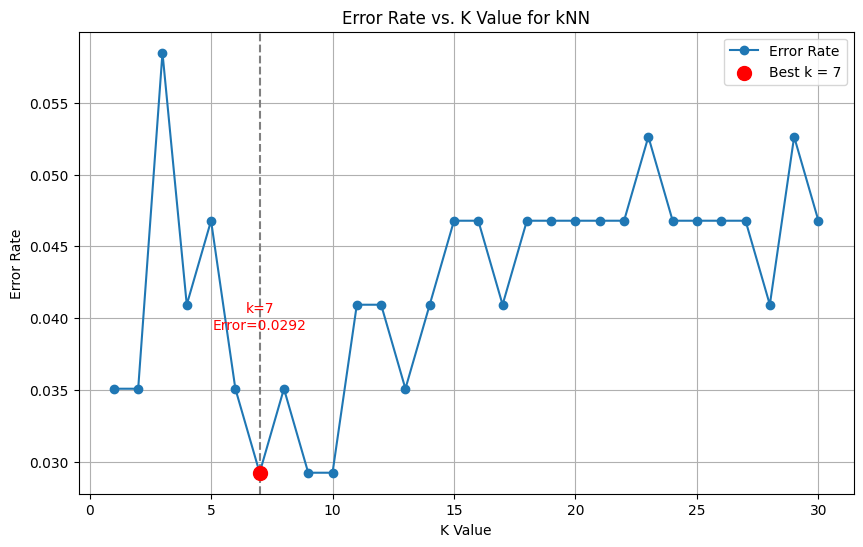

In [130]:
# Define the range of k values to test
k_values = list(range(1, 31))

# Initialize the list to store error rates
error_rates = []

# Loop through k values and calculate the error rate
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pretreated, y_train_pretreated)
    y_pred = knn.predict(X_test_selected_scaled_no_outliers)
    error_rate = 1 - accuracy_score(y_test, y_pred)  # Error rate = 1 - accuracy
    error_rates.append(error_rate)

# Find the k value with the lowest error rate
min_error_rate = min(error_rates)
best_k = k_values[error_rates.index(min_error_rate)]

# Plot the error rate as a function of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='-', label='Error Rate')

# Highlight the best k value
plt.scatter(best_k, min_error_rate, color='red', s=100, zorder=5, label=f'Best k = {best_k}')
plt.axvline(x=best_k, linestyle='--', color='gray')  # Projection on the x-axis

# Add a text annotation to show the best k and error rate
plt.text(best_k, min_error_rate + 0.01, f'k={best_k}\nError={min_error_rate:.4f}',
         ha='center', color='red')

# Plot title and labels
plt.title('Error Rate vs. K Value for kNN')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.grid(True)
plt.legend()
plt.show()




According to the line graph above showing the error rate as a function of the value of k, k=7 is the best option, with the lowest error rate (error rate = 2.9%).

Let's adopt it and apply the KNN classification algorithm


Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
             Metric     Value
0  Accuracy (Train)  0.975904
1   Accuracy (Test)  0.970760
2         Precision  0.967742
3            Recall  0.952381
4          F1-Score  0.960000
Confusion Matrix:
[[106   2]
 [  3  60]]


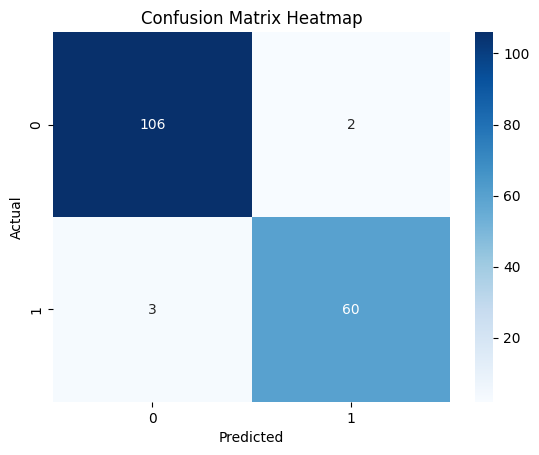

In [131]:
param_grid = {
    'n_neighbors': [7],  # n_neighbors fixed at 7
    'weights': ['uniform', 'distance'],  # Explore different weight options
    'metric': ['euclidean', 'manhattan']  # Explore different distance metrics
}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='recall')  # Use 5-fold cross-validation

# Fit the grid search to the training data
grid_search.fit(X_train_pretreated, y_train_pretreated)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_knn = grid_search.best_estimator_

# Calculate training accuracy
train_accuracy_knn = best_knn.score(X_train_pretreated, y_train_pretreated)

# Make predictions on the test data
y_pred = best_knn.predict(X_test_selected_scaled_no_outliers)

# Calculate evaluation metrics for the test data
test_accuracy_knn = accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy (Train)', 'Accuracy (Test)', 'Precision', 'Recall', 'F1-Score'],
    'Value': [train_accuracy_knn, test_accuracy_knn, precision_knn, recall_knn, f1_knn]
})

# Print the metrics DataFrame
print(metrics_df)

# Create the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm_knn)

# Display the heatmap of the confusion matrix
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


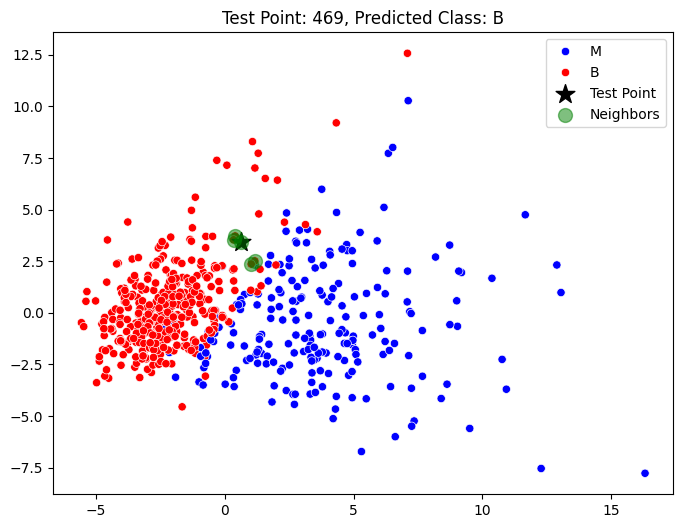

In [132]:
# Data preprocessing (important for KNN)
X = df.drop(['id', 'diagnosis'], axis=1)  # Features
y = df['diagnosis']  # Target variable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Adjust 'n_neighbors' as needed
knn.fit(X_pca, y)

# Animation function
def animate(i):
    # Select a random test point
    test_point_index = np.random.randint(0, len(X_pca))
    test_point = X_pca[test_point_index]

    # Calculate distances and get the nearest neighbors
    distances, indices = knn.kneighbors([test_point])
    neighbors = X_pca[indices[0]]

    # Clear previous plot and redraw
    ax.clear()
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=['blue', 'red'], ax=ax)
    ax.scatter(test_point[0], test_point[1], marker='*', s=200, color='black', label='Test Point')  # Highlight test point
    ax.scatter(neighbors[:, 0], neighbors[:, 1], marker='o', s=100, color='green', alpha=0.5, label='Neighbors')  # Highlight neighbors

    # Display predicted class
    predicted_class = knn.predict([test_point])[0]
    ax.set_title(f"Test Point: {test_point_index}, Predicted Class: {predicted_class}")
    ax.legend()

# Create the animation
fig, ax = plt.subplots(figsize=(8, 6))
ani = animation.FuncAnimation(fig, animate, frames=20, interval=500, repeat=True)

# Display animation in Colab (using HTML)
HTML(ani.to_html5_video())


# Support Vector Machines (SVM) 🖥️

             Metric     Value
0  Accuracy (Train)  0.973896
1   Accuracy (Test)  0.976608
2         Precision  0.968254
3            Recall  0.968254
4          F1-Score  0.968254

Confusion Matrix:
[[106   2]
 [  2  61]]


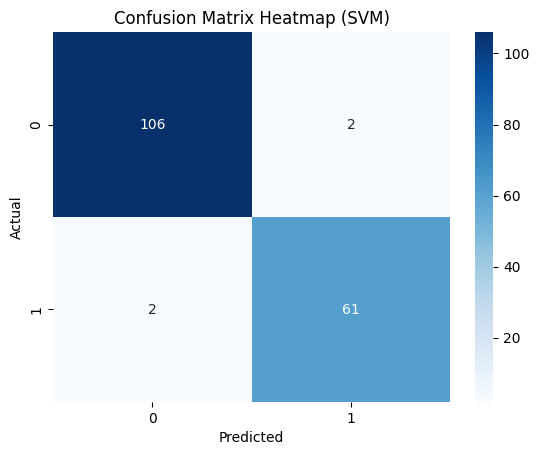

In [133]:
# Create an SVM model
svm_model = SVC(kernel='linear')  # Using a linear kernel

# Train the model on the training data
svm_model.fit(X_train_pretreated, y_train_pretreated)

# Make predictions on training and test data
y_pred_train = svm_model.predict(X_train_pretreated)
y_pred_test = svm_model.predict(X_test_selected_scaled_no_outliers)

# Calculate evaluation metrics
train_accuracy_svm = accuracy_score(y_train_pretreated, y_pred_train)
test_accuracy_svm = accuracy_score(y_test, y_pred_test)

precision_svm = precision_score(y_test, y_pred_test)
recall_svm = recall_score(y_test, y_pred_test)
f1_svm = f1_score(y_test, y_pred_test)
conf_matrix_svm = confusion_matrix(y_test, y_pred_test)

# Create a DataFrame for the results
results_svm = pd.DataFrame({
    'Metric': ['Accuracy (Train)', 'Accuracy (Test)', 'Precision', 'Recall', 'F1-Score'],
    'Value': [train_accuracy_svm, test_accuracy_svm, precision_svm, recall_svm, f1_svm]
})

# Display results and confusion matrix
print(results_svm)
print("\nConfusion Matrix:")
print(conf_matrix_svm)

# Display heatmap of the confusion matrix
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap (SVM)")
plt.show()


Maintenant, visualisons comment l'algorithme SVM détermine l'hyperplan en utilisant les deux premières composantes principales pour la visualisation.

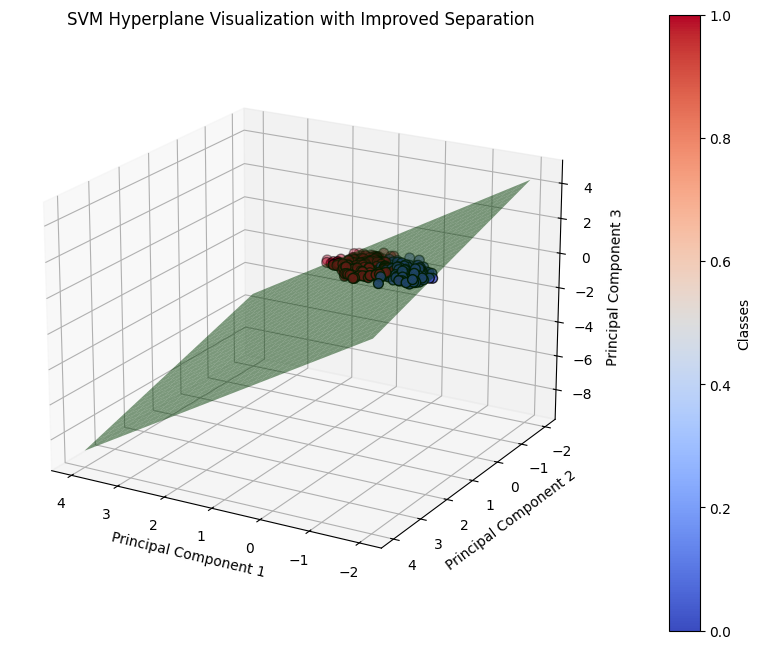

In [134]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train_pretreated)

# Create an SVM model
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_pca, y_train_pretreated)

# Obtain the separating hyperplane
w = svm_model.coef_[0]
a = -w[0] / w[2]
b = -w[1] / w[2]
xx, yy = np.meshgrid(np.linspace(-2, 4, 30), np.linspace(-2, 4, 30))  # Increase the resolution of the meshgrid
zz = a * xx + b * yy - (svm_model.intercept_[0]) / w[2]

# Plot data points and the hyperplane
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points with lighter colors
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_train_pretreated, cmap='coolwarm', s=50, edgecolors='k')

# Add a color bar to distinguish the two classes
colorbar = plt.colorbar(scatter, ax=ax, pad=0.1)
colorbar.set_label('Classes')

# Plot the hyperplane with a distinctive color
ax.plot_surface(xx, yy, zz, color='green', alpha=0.5)

# Adjust the view angle for better visualization of the separation
ax.view_init(elev=20, azim=120)

# Labels and titles
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("SVM Hyperplane Visualization with Improved Separation")

# Show plot
plt.show()


# Accuracies and Recalls analysis for all models 📊

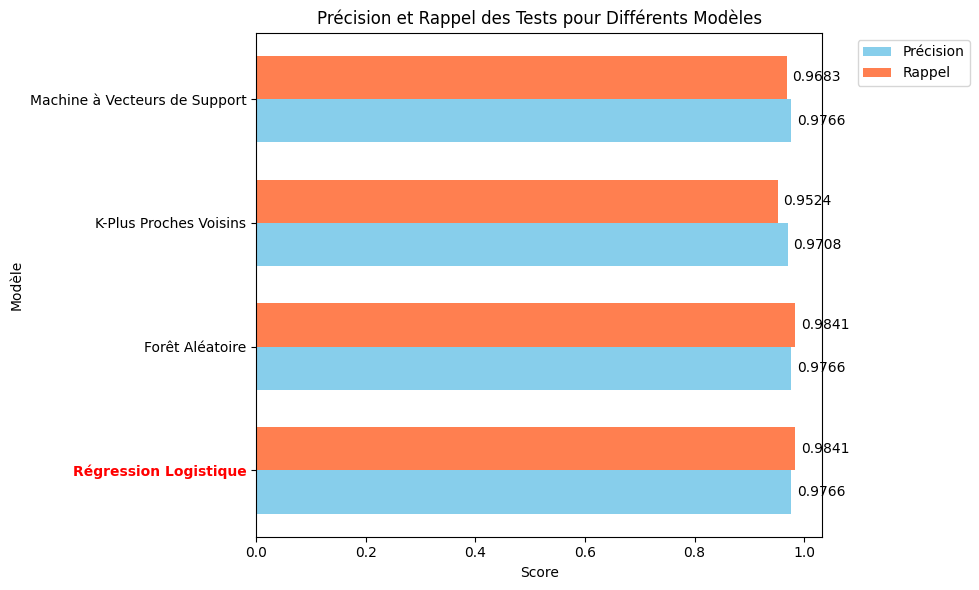

In [142]:
import matplotlib.pyplot as plt
import numpy as np

# Define scores and models
accuracy_scores = [accuracy_test_logistic, test_accuracy_rf_tree, test_accuracy_knn, test_accuracy_svm]
recall_scores = [recall_logistic_final, recall_rf_tree, recall_knn, recall_svm]
models = ['Régression Logistique', 'Forêt Aléatoire', 'K-Plus Proches Voisins', 'Machine à Vecteurs de Support']

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Define bar width and y-axis index positions
bar_width = 0.35
index = np.arange(len(models))

# Plot accuracy and recall bars
accuracy_bars = ax.barh(index, accuracy_scores, bar_width, label='Précision', color='skyblue')
recall_bars = ax.barh(index + bar_width, recall_scores, bar_width, label='Rappel', color='coral')

# Set labels and title
ax.set_xlabel('Score')
ax.set_ylabel('Modèle')
ax.set_title('Précision et Rappel des Tests pour Différents Modèles')
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(models)

# Place legend outside the chart
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Highlight the best model by total score
best_model_index = np.argmax(np.array(accuracy_scores) + np.array(recall_scores))
ax.get_yticklabels()[best_model_index].set_color('red')
ax.get_yticklabels()[best_model_index].set_weight('bold')

# Add value labels to bars
def add_labels(bars):
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.01, bar.get_y() + bar.get_height() / 2, f'{width:.4f}', ha='left', va='center')

add_labels(accuracy_bars)
add_labels(recall_bars)

# Show the chart
plt.tight_layout()
plt.show()



The results obtained from our study are unequivocal: **SVM** proves to be **the algorithm of choice** for breast cancer prediction! \
 With **a recall rate of 0.9683** and an accuracy rate of 0.9766**, these results are nothing short of remarkable ⚡

This exceptional performance can be explained by the advanced nature of SVMs when it comes to classification. Indeed, SVMs are particularly adept at finding optimal decision boundaries between different classes of data, which is crucial for a medical diagnosis as delicate as breast cancer.

N.B ❗: The choice of recall rate as the main metric is fully justified in this context. \

In medicine, it's vital not to miss any positive cases 🩺 i.e. to identify all patients with cancer. A false negative could have dramatic consequences. The accuracy rate, meanwhile, ensures that we have a globally efficient and reliable model.

In conclusion, SVMs are a promising tool to help diagnose breast cancer. The encouraging results obtained in our study pave the way for new research perspectives in this field.
